<a href="https://colab.research.google.com/github/Nittrik86/hello-world/blob/main/prototype_x_fake_news_classifier_nltk_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prototype X - Fake News Classifier - NLTK**

**Introduction**

In this notebook, we have created a prototype classifier using NLTK to detect the fake news with the Liar data set available at [CRRIC - Google Drive](https://drive.google.com/drive/folders/1DwkDjezEGielFJknCNEsEZ75mjLpuJih)


![](https://miro.medium.com/max/1400/0*Qq8FcR-mgnvjWZLQ.gif)

Picture Credit: https://miro.medium.com

**What is NLP?**
> Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.

Ref: https://en.wikipedia.org/wiki/Natural_language_processing


![](https://www.meccanismocomplesso.org/wp-content/uploads/2020/03/NLTK-Native-Language-Tool-Kit-la-libreria-Python-per-il-Language-Processing-and-Analysis.jpg)

**What is NLTK?**
> The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning. It also includes graphical demonstrations and sample data sets as well as accompanied by a cook book and a book which explains the principles behind the underlying language processing tasks that NLTK supports.

Ref: https://www.techopedia.com/definition/30343/natural-language-toolkit-nltk


Picture Credit: https://www.meccanismocomplesso.org/en/nltk-native-language-tool-kit-the-python-library-for-language-processing-and-analysis/



**Process we will be using in this notebook**

We will be using below process along with 
![](https://miro.medium.com/max/512/0*qFc43AZIq_UQd27x.png)


**Instructions**

1. This notebook was created using the Liar Dataset which is available at [CRRIC - Google Drive](https://drive.google.com/drive/folders/1DwkDjezEGielFJknCNEsEZ75mjLpuJih), we have leveraged 2 files Test.tsv and Train.tsv for this analysis.
2. Kindly run each cell as per their respective sequence.
3. If you download and install the packages in your first run, you can comment out them for quick processing.

**Note** - This is a prototype, which was developed to show an overview of NLP techniques to combat disinformation. Further development is required, please document your feedback and comments for future development.

#### Importing pandas library

# New Section

In [1]:
# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade watermark blackcellmagic"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)

In [2]:
%load_ext blackcellmagic

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np  # linear algebra
import pandas as pd  # data processing
import re
import requests
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

import warnings

warnings.filterwarnings("ignore")  # setting ignore as a parameter

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.tsv to test (4).tsv
Saving train.tsv to train (4).tsv


#### Reading .tsv files from dataset

In [4]:
fakenews_train_df = pd.read_csv("train.tsv", sep="\t")
fakenews_test_df = pd.read_csv("test.tsv", sep="\t")

In [5]:
fakenews_train_df.head(5)

,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [6]:
fakenews_test_df.head(5)

,11972.json,true,Building a wall on the U.S.-Mexico border will take literally years.,immigration,rick-perry,Governor,Texas,republican,30,30.1,42,23,18,Radio interview
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


#### Adding column names in test data

In [7]:
column_names = [
    "col1",
    "col2",
    "col3",
    "col4",
    "col5",
    "col6",
    "col7",
    "col8",
    "col9",
    "col10",
    "col11",
    "col12",
    "col13",
    "col14",
]
fakenews_test_df.columns = column_names
fakenews_test_df.head(5)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


#### Adding column names in train data

In [8]:
column_names = [
    "col1",
    "col2",
    "col3",
    "col4",
    "col5",
    "col6",
    "col7",
    "col8",
    "col9",
    "col10",
    "col11",
    "col12",
    "col13",
    "col14",
]
fakenews_train_df.columns = column_names
fakenews_train_df.head(5)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


#### Reviewing column names in test Data

In [9]:
fakenews_test_df.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10', 'col11', 'col12', 'col13', 'col14'],
      dtype='object')

#### Reviewing column names in train Data

In [10]:
fakenews_train_df.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10', 'col11', 'col12', 'col13', 'col14'],
      dtype='object')

#### Dropping unused columns from train data

In [11]:
fakenews_train_df.drop(
    [
        "col1",
        "col4",
        "col6",
        "col7",
        "col8",
        "col9",
        "col10",
        "col11",
        "col12",
        "col13",
        "col14",
    ],
    axis=1,
    inplace=True,
)

In [12]:
fakenews_train_df.head(5)

,col2,col3,col5
0,half-true,When did the decline of coal start? It started...,scott-surovell
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",barack-obama
2,false,Health care reform legislation is likely to ma...,blog-posting
3,half-true,The economic turnaround started at the end of ...,charlie-crist
4,true,The Chicago Bears have had more starting quart...,robin-vos


#### Dropping unused columns from test data

In [13]:
fakenews_test_df.drop(
    [
        "col1",
        "col4",
        "col6",
        "col7",
        "col8",
        "col9",
        "col10",
        "col11",
        "col12",
        "col13",
        "col14",
    ],
    axis=1,
    inplace=True,
)

In [14]:
fakenews_train_df.head(5)

,col2,col3,col5
0,half-true,When did the decline of coal start? It started...,scott-surovell
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",barack-obama
2,false,Health care reform legislation is likely to ma...,blog-posting
3,half-true,The economic turnaround started at the end of ...,charlie-crist
4,true,The Chicago Bears have had more starting quart...,robin-vos


#### Creating an id column in train and test data

In [15]:
fakenews_train_df["id"] = np.arange(len(fakenews_train_df))
fakenews_test_df["id"] = np.arange(len(fakenews_test_df))

In [16]:
fakenews_test_df.head(5)

,col2,col3,col5,id
0,false,Wisconsin is on pace to double the number of l...,katrina-shankland,0
1,false,Says John McCain has done nothing to help the ...,donald-trump,1
2,half-true,Suzanne Bonamici supports a plan that will cut...,rob-cornilles,2
3,pants-fire,When asked by a reporter whether hes at the ce...,state-democratic-party-wisconsin,3
4,true,Over the past five years the federal governmen...,brendan-doherty,4


In [17]:
fakenews_train_df.head(5)

,col2,col3,col5,id
0,half-true,When did the decline of coal start? It started...,scott-surovell,0
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",barack-obama,1
2,false,Health care reform legislation is likely to ma...,blog-posting,2
3,half-true,The economic turnaround started at the end of ...,charlie-crist,3
4,true,The Chicago Bears have had more starting quart...,robin-vos,4


#### Replacing "-" with space from column 5 in test and train data

In [18]:
fakenews_train_df["col5"] = fakenews_train_df["col5"].str.replace("\-", " ", regex=True)
fakenews_train_df.head(5)

,col2,col3,col5,id
0,half-true,When did the decline of coal start? It started...,scott surovell,0
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",barack obama,1
2,false,Health care reform legislation is likely to ma...,blog posting,2
3,half-true,The economic turnaround started at the end of ...,charlie crist,3
4,true,The Chicago Bears have had more starting quart...,robin vos,4


In [19]:
fakenews_test_df["col5"] = fakenews_test_df["col5"].str.replace("\-", " ", regex=True)
fakenews_test_df.head(5)

,col2,col3,col5,id
0,false,Wisconsin is on pace to double the number of l...,katrina shankland,0
1,false,Says John McCain has done nothing to help the ...,donald trump,1
2,half-true,Suzanne Bonamici supports a plan that will cut...,rob cornilles,2
3,pants-fire,When asked by a reporter whether hes at the ce...,state democratic party wisconsin,3
4,true,Over the past five years the federal governmen...,brendan doherty,4


#### Capitalizing column 5

In [20]:
fakenews_test_df.col5 = fakenews_test_df.col5.str.title()
fakenews_train_df.col5 = fakenews_train_df.col5.str.title()

In [21]:
fakenews_test_df.head(5)

,col2,col3,col5,id
0,false,Wisconsin is on pace to double the number of l...,Katrina Shankland,0
1,false,Says John McCain has done nothing to help the ...,Donald Trump,1
2,half-true,Suzanne Bonamici supports a plan that will cut...,Rob Cornilles,2
3,pants-fire,When asked by a reporter whether hes at the ce...,State Democratic Party Wisconsin,3
4,true,Over the past five years the federal governmen...,Brendan Doherty,4


In [22]:
fakenews_train_df.head(5)

,col2,col3,col5,id
0,half-true,When did the decline of coal start? It started...,Scott Surovell,0
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Barack Obama,1
2,false,Health care reform legislation is likely to ma...,Blog Posting,2
3,half-true,The economic turnaround started at the end of ...,Charlie Crist,3
4,true,The Chicago Bears have had more starting quart...,Robin Vos,4


#### Renaming column names in test and train data

In [23]:
fakenews_test_df.rename(
    columns={"col2": "label name", "col3": "news", "col5": "author"}, inplace=True
)
fakenews_train_df.rename(
    columns={"col2": "label name", "col3": "news", "col5": "author"}, inplace=True
)

In [24]:
fakenews_test_df.head(5)

,label name,news,author,id
0,false,Wisconsin is on pace to double the number of l...,Katrina Shankland,0
1,false,Says John McCain has done nothing to help the ...,Donald Trump,1
2,half-true,Suzanne Bonamici supports a plan that will cut...,Rob Cornilles,2
3,pants-fire,When asked by a reporter whether hes at the ce...,State Democratic Party Wisconsin,3
4,true,Over the past five years the federal governmen...,Brendan Doherty,4


In [25]:
fakenews_train_df.head(5)

,label name,news,author,id
0,half-true,When did the decline of coal start? It started...,Scott Surovell,0
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Barack Obama,1
2,false,Health care reform legislation is likely to ma...,Blog Posting,2
3,half-true,The economic turnaround started at the end of ...,Charlie Crist,3
4,true,The Chicago Bears have had more starting quart...,Robin Vos,4


#### Creating a new column "label" based on column "label name" in test and train data

In [26]:
fakenews_test_df["label name"] = fakenews_test_df["label name"].astype(str)
# make a new column called label names
fakenews_test_df["label"] = fakenews_test_df["label name"]
# add a new column with label name descriptions called label
fakenews_test_df["label"] = fakenews_test_df["label"].replace(
    {
        "true": "0",
        "false": "1",
        "half-true": "0",
        "pants-fire": "0",
        "barely-true": "0",
        "mostly-true": "0",
    }
)
fakenews_test_df.head(5)

,label name,news,author,id,label
0,false,Wisconsin is on pace to double the number of l...,Katrina Shankland,0,1
1,false,Says John McCain has done nothing to help the ...,Donald Trump,1,1
2,half-true,Suzanne Bonamici supports a plan that will cut...,Rob Cornilles,2,0
3,pants-fire,When asked by a reporter whether hes at the ce...,State Democratic Party Wisconsin,3,0
4,true,Over the past five years the federal governmen...,Brendan Doherty,4,0


In [27]:
fakenews_train_df["label name"] = fakenews_train_df["label name"].astype(str)
# make a new column called label names
fakenews_train_df["label"] = fakenews_train_df["label name"]
# add a new column with label name descriptions called label
fakenews_train_df["label"] = fakenews_train_df["label"].replace(
    {
        "true": "0",
        "false": "1",
        "half-true": "0",
        "pants-fire": "0",
        "barely-true": "0",
        "mostly-true": "0",
    }
)
fakenews_train_df.head(5)

,label name,news,author,id,label
0,half-true,When did the decline of coal start? It started...,Scott Surovell,0,0
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Barack Obama,1,0
2,false,Health care reform legislation is likely to ma...,Blog Posting,2,1
3,half-true,The economic turnaround started at the end of ...,Charlie Crist,3,0
4,true,The Chicago Bears have had more starting quart...,Robin Vos,4,0


#### Final test and train data review

In [28]:
train = fakenews_train_df
test = fakenews_test_df
# print(train.shape, test.shape)
print("Shape of Training data: ", train.shape)
print("Shape of Testing data: ", test.shape)

Shape of Training data:  (10239, 5)
Shape of Testing data:  (1266, 5)


#### Data type 'object' to "int" conversion of column label in test and train data

In [29]:
train["label"] = pd.to_numeric(train["label"])
test["label"] = pd.to_numeric(test["label"])

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label name  10239 non-null  object
 1   news        10239 non-null  object
 2   author      10237 non-null  object
 3   id          10239 non-null  int64 
 4   label       10239 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 400.1+ KB


#### frequency review of label in training data

In [31]:
class_labels = train["label"].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print("Freq", freq_list)
print("number", class_labels_set)

Freq [8245, 1994]
number {0, 1}


In [32]:
large = 22
med = 16
small = 12
params = {
    "axes.titlesize": large,
    "legend.fontsize": med,
    "figure.figsize": (16, 10),
    "axes.labelsize": med,
    "axes.titlesize": med,
    "xtick.labelsize": med,
    "ytick.labelsize": med,
    "figure.titlesize": large,
}
plt.rcParams.update(params)
plt.style.use("seaborn-whitegrid")
sns.set_style("darkgrid")

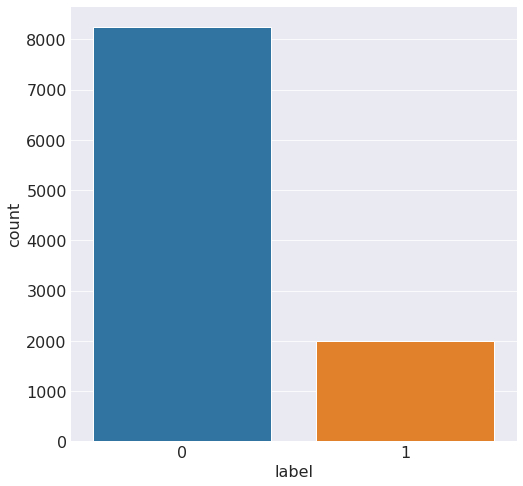

In [33]:
# plot the number of samples per class
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.countplot(x="label", data=train)

In [34]:
train.head()

,label name,news,author,id,label
0,half-true,When did the decline of coal start? It started...,Scott Surovell,0,0
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Barack Obama,1,0
2,false,Health care reform legislation is likely to ma...,Blog Posting,2,1
3,half-true,The economic turnaround started at the end of ...,Charlie Crist,3,0
4,true,The Chicago Bears have had more starting quart...,Robin Vos,4,0


In [35]:
train.describe()

,id,label
count,10239.000000,10239.000000
mean,5119.000000,0.194746
std,2955.889037,0.396024
min,0.000000,0.000000
25%,2559.500000,0.000000
50%,5119.000000,0.000000
75%,7678.500000,0.000000
max,10238.000000,1.000000


In [36]:
train.columns

Index(['label name', 'news', 'author', 'id', 'label'], dtype='object')

#### Checking null values in train data

In [37]:
# how many null values in the dataset
print("Null values in train data:")
print(train.isnull().sum())
print("\n\n")

print("Null values in test data:")
print(test.isnull().sum())

Null values in train data:
label name    0
news          0
author        2
id            0
label         0
dtype: int64



Null values in test data:
label name    0
news          0
author        0
id            0
label         0
dtype: int64


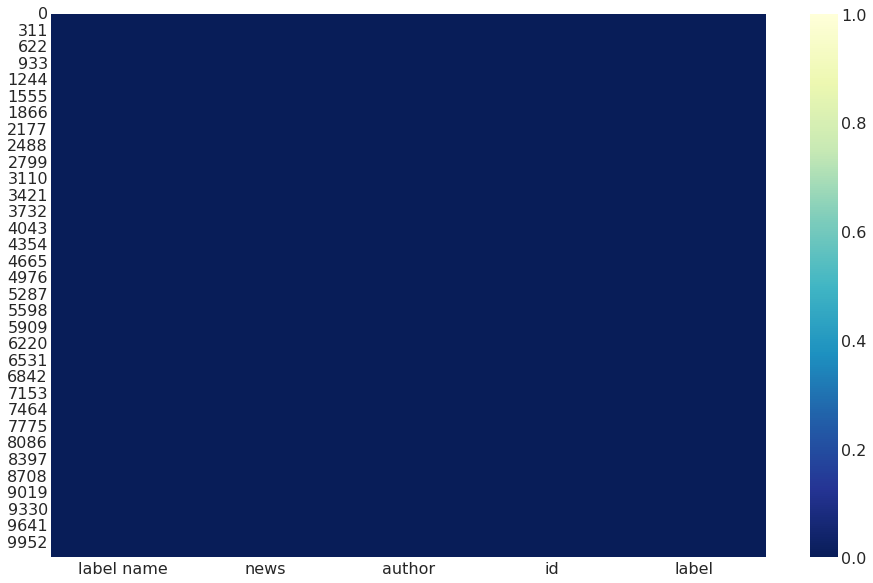

In [38]:
sns.heatmap(train.isnull(), cmap="YlGnBu_r")

In [39]:
print(train.dtypes)

label name    object
news          object
author        object
id             int64
label          int64
dtype: object


#### Missing Data Imputation

In [40]:
# imputing the data
test = test.fillna(" ")
train = train.fillna(" ")

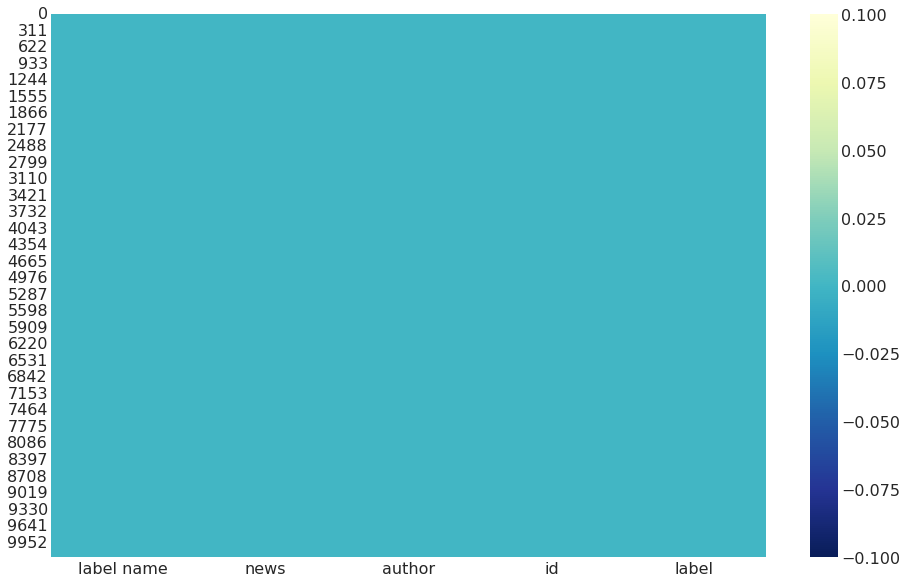

In [41]:
sns.heatmap(train.isnull(), cmap="YlGnBu_r")

#### Top 20 words in dataset before removing stop words

the 9794
in 5150
of 4828
to 4501
and 2851
says 2370
for 2126
that 1864
is 1802
on 1517
has 1298
have 1276
percent 1191
are 1134
than 1103
we 948
was 945
more 938
by 858
state 853


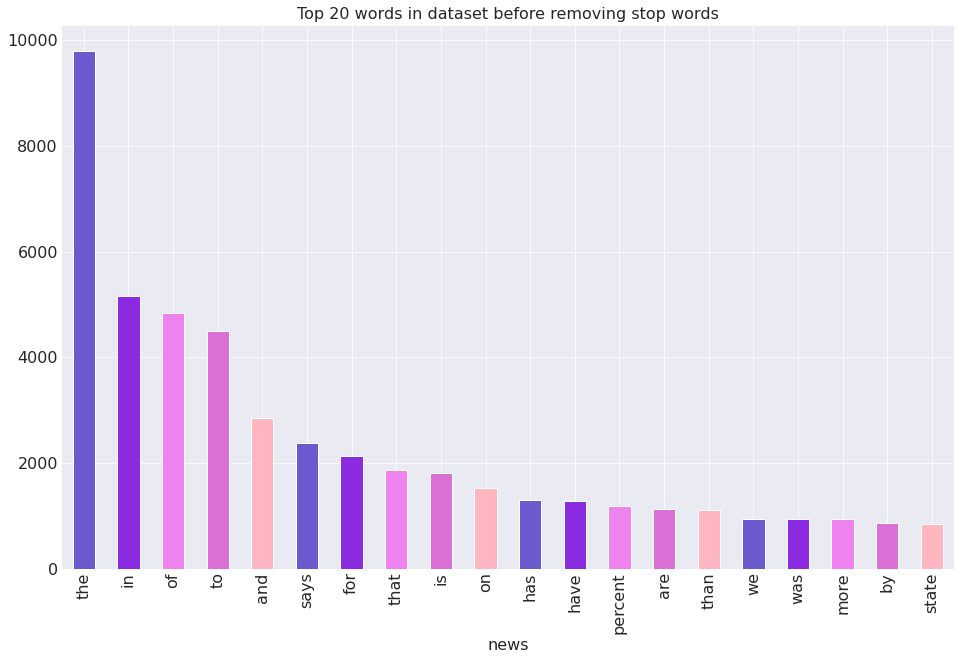

In [42]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(train["news"], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns=["news", "count"])
df1.groupby("news").sum()["count"].sort_values(ascending=False).plot(
    kind="bar",
    title="Top 20 words in dataset before removing stop words",
    color=["slateblue", "blueviolet", "violet", "orchid", "lightpink"],
)

#### Top 20 words in dataset before removing stop words
This visual will give you an overview of the top 20 words before removing the stop words from our data.

the 9794
in 5150
of 4828
to 4501
and 2851
says 2370
for 2126
that 1864
is 1802
on 1517
has 1298
have 1276
percent 1191
are 1134
than 1103
we 948
was 945
more 938
by 858
state 853


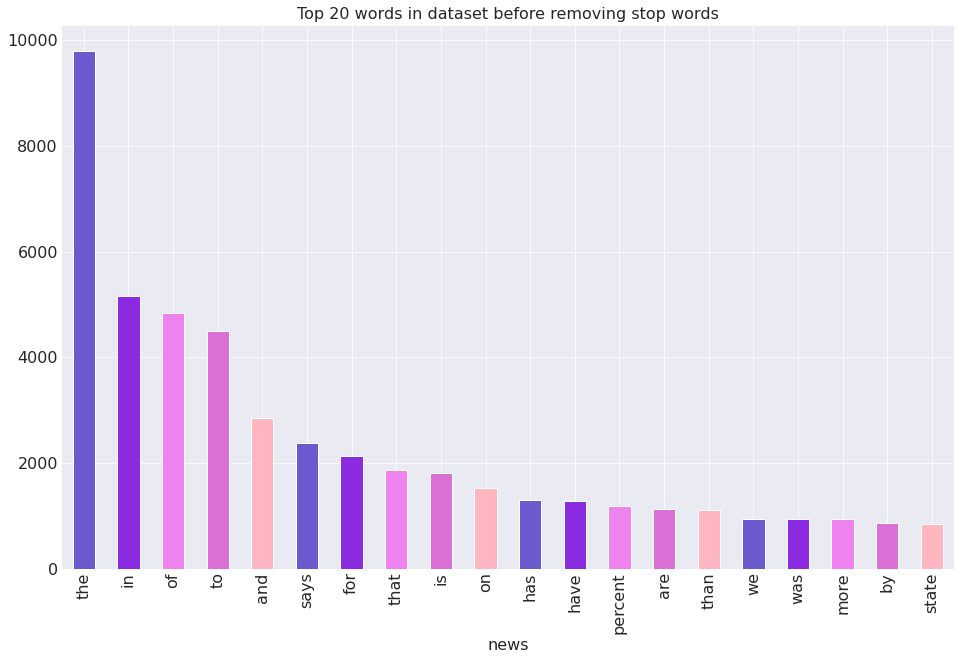

In [43]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(train["news"], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns=["news", "count"])
df1.groupby("news").sum()["count"].sort_values(ascending=False).plot(
    kind="bar",
    title="Top 20 words in dataset before removing stop words",
    color=["slateblue", "blueviolet", "violet", "orchid", "lightpink"],
)

#### Number of True vs Fake News in the dataset

This visual will give and overview of the True vs Fake in the Liar dataset

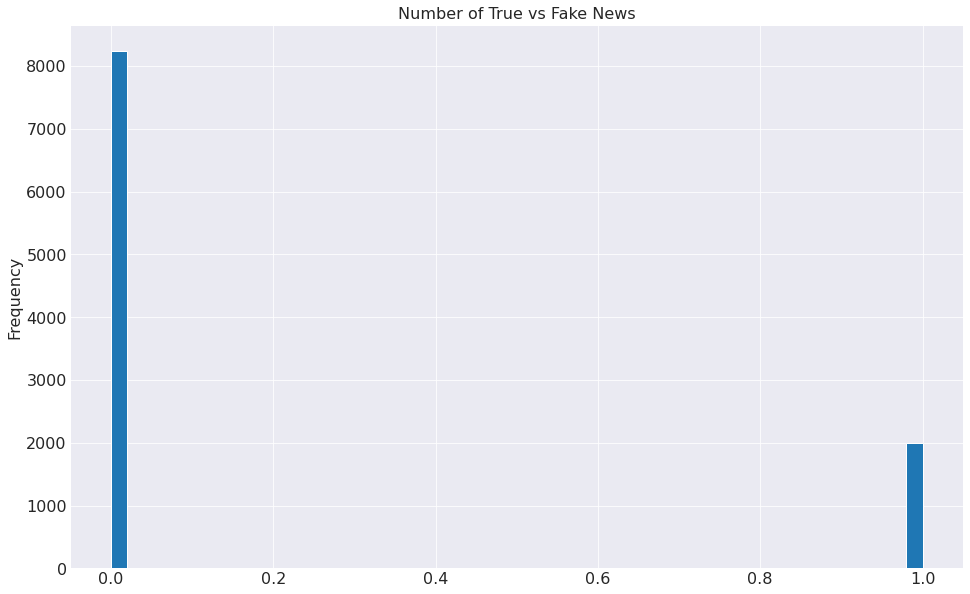

In [44]:
train["label"].plot(kind="hist", bins=50, title="Number of True vs Fake News")

#### Merging the columns (title, author, text) into one column

In [45]:
test["content"] = test["news"] + " " + test["author"]
train["content"] = train["news"] + " " + train["author"]

In [46]:
train.head()

,label name,news,author,id,label,content
0,half-true,When did the decline of coal start? It started...,Scott Surovell,0,0,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Barack Obama,1,0,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...,Blog Posting,2,1,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...,Charlie Crist,3,0,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...,Robin Vos,4,0,The Chicago Bears have had more starting quart...


### Cleaning and Preprocessing

#### Regex

* Regular expressions (called REs, or regexes, or regex patterns) are essentially a tiny, highly specialized programming language embedded inside Python and made available through the re module. Using this little language, you specify the rules for the set of possible strings that you want to match; this set might contain English sentences, or e-mail addresses, or TeX commands, or anything you like. You can then ask questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use REs to modify a string or to split it apart in various ways.Below is the example of removing Regex :

In [47]:
# Remove punctuations from the String
sample = "!</> NLP is $$ </>^sh!!!o%%rt &&%$fo@@@r^^^&&!& </>*Natural@# Language&&\ Pro@@@##%^^&cessing!@# %%$"

# what is gonna get selected we r gonna replace that with the empty string(2nd parameter)
sample = re.sub(r"[^\w\s]", "", sample)

print(sample)

 NLP is  short for Natural Language Processing 


#### Tokenization

* Tokenizing data simply means splitting the body of the text. The process involved in this is Python text strings are converted to streams of token objects. It is to be noted that each token is a separate word, number, email, punctuation sign, URL/URI etc. There is also segmentation of tokens into streams of sentences having dates and abbreviation in the middle of the sentences. Below is the example of removing Tokenization:

In [48]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [49]:
print(
    'The NLTK tokeniser has tokenised "Computers are not as great at understanding words as they are numbers." into a list of tokens ',
    end="\n\n",
)
print(
    nltk.word_tokenize(
        "Computers are not as great at understanding words as they are numbers."
    )
)

The NLTK tokeniser has tokenised "Computers are not as great at understanding words as they are numbers." into a list of tokens 

['Computers', 'are', 'not', 'as', 'great', 'at', 'understanding', 'words', 'as', 'they', 'are', 'numbers', '.']


#### Removing StopWords

* Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment. Below is the example of removing StopWords:

In [50]:
sample_text = "Does this thing really work? Lets see."

In [51]:
words = nltk.word_tokenize(sample_text)
print(words)

['Does', 'this', 'thing', 'really', 'work', '?', 'Lets', 'see', '.']


In [52]:
from nltk.corpus import stopwords

# corpus of nltk will hold the stopwords

stop = stopwords.words("english")
print(stop)

clean_words = [w for w in words if not w in stop]
# this is basically saying go through each word and add it into this new array only if it's not a part of the stopwords

for i in clean_words:
    print(i)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
import string

punctuations = list(string.punctuation)

print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [54]:
stop = stop + punctuations
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [55]:
clean_words = [w for w in words if not w in stop]
clean_words
# clean_words includes all the words in the sentence excluding the stopwords

['Does', 'thing', 'really', 'work', 'Lets', 'see']

#### Lemmatization

* Lemmatization \is the algorithmic process of finding the lemma of a word depending on its meaning and context. Lemmatization usually refers to the morphological analysis of words, which aims to remove inflectional endings. It helps in returning the base or dictionary form of a word known as the lemma. Below is the example of Lemmatization:

In [56]:
from nltk.stem import WordNetLemmatizer

# Using WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

input_str = "Kites Babies Meeting Is Done Languages Cities Mice"

In [57]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize the sentence
input_str = nltk.word_tokenize(input_str)

In [58]:
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()  # need to tokenise the complee sentence


print(
    "Below, see how kites->kite, babies->baby, languages -> language, cities -> city, mice -> mouse. Stemming couldn't have done this",
    end="\n\n",
)
# now each token i ll pass to he lemmatizer to see its reduced form
# Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word).lower())

Below, see how kites->kite, babies->baby, languages -> language, cities -> city, mice -> mouse. Stemming couldn't have done this

kites
babies
meeting
is
done
languages
cities
mice


#### Pre-Processing

In [59]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
for index, row in train.iterrows():  # taking he train data and iterating each row
    filter_sentence = ""

    sentence = row["content"]
    sentence = re.sub(r"[^\w\s]", "", sentence)

    words = nltk.word_tokenize(sentence)  # tokenizing the sentence

    words = [w for w in words if not w in stop]  # removing the stopwords

    # after removing the stopwords, applying the WornNet Lemmatizer
    for word in words:
        filter_sentence = (
            filter_sentence + " " + str(lemmatizer.lemmatize(word)).lower()
        )

    # at the end, again putting the filter_sentence back into the training document at the same position
    train.loc[index, "content"] = filter_sentence

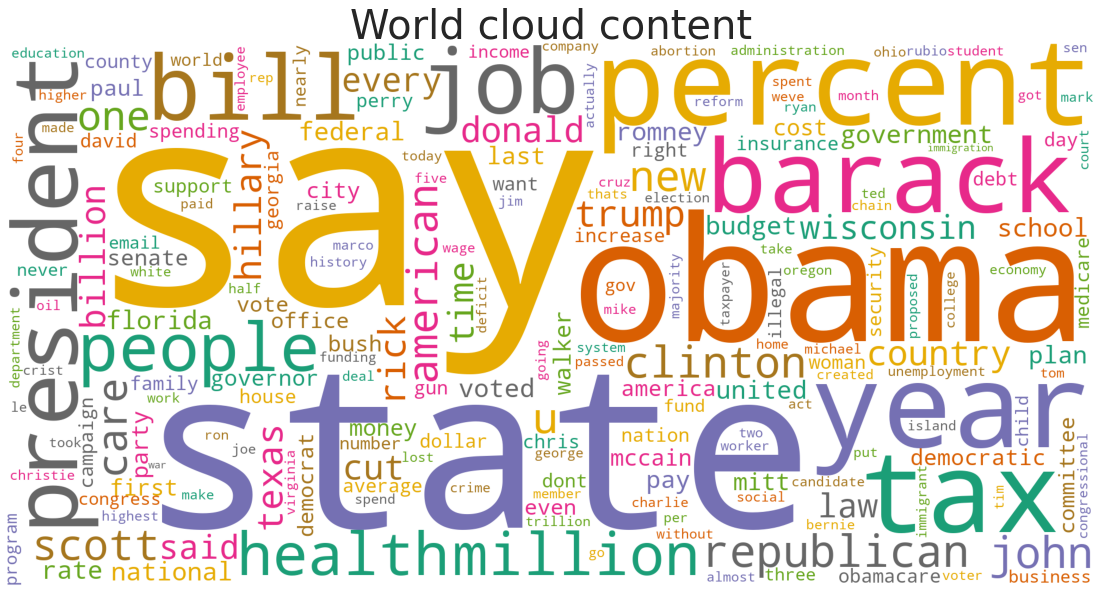

In [60]:
def plot_wordcloud(data):
    plt.figure(figsize=(20, 10))
    # news_subset = df[df['label']==news_label]
    news_text = data.content.values
    wcloud = WordCloud(
        background_color="white",
        colormap="Dark2",
        collocations=False,
        width=2000,
        height=1000,
    ).generate(" ".join(news_text))

    plt.axis("off")
    plt.title("World Cloud Content".capitalize(), fontsize=40)
    plt.imshow(wcloud)


plot_wordcloud(train)

says 2255
obama 1196
percent 1185
year 1162
state 1096
tax 1057
barack 841
president 640
job 634
health 610
people 609
million 594
john 562
clinton 527
scott 519
care 510
new 499
rick 455
republican 445
hillary 442


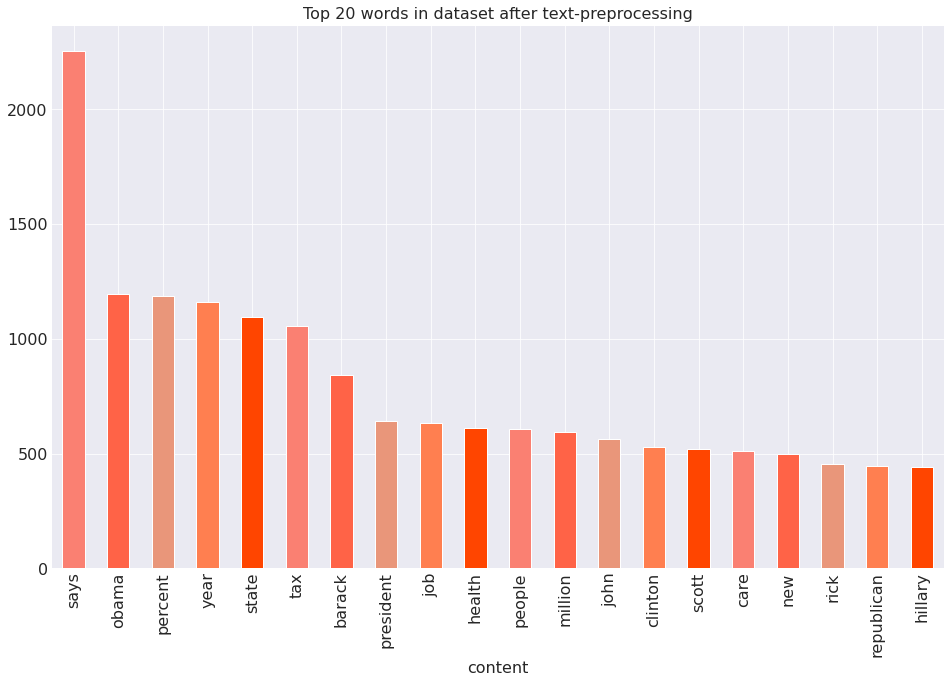

In [61]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(train["content"], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns=["content", "count"])
df2.groupby("content").sum()["count"].sort_values(ascending=False).plot(
    kind="bar",
    title="Top 20 words in dataset after text-preprocessing",
    color=["salmon", "tomato", "darksalmon", "coral", "orangered"],
)

barack obama 769
hillary clinton 408
health care 404
donald trump 392
united states 299
mitt romney 280
scott walker 244
john mccain 201
rick perry 194
rick scott 164
president barack 162
marco rubio 159
chain email 142
social security 131
president obama 121
ted cruz 119
health insurance 111
chris christie 109
charlie crist 98
rhode island 93


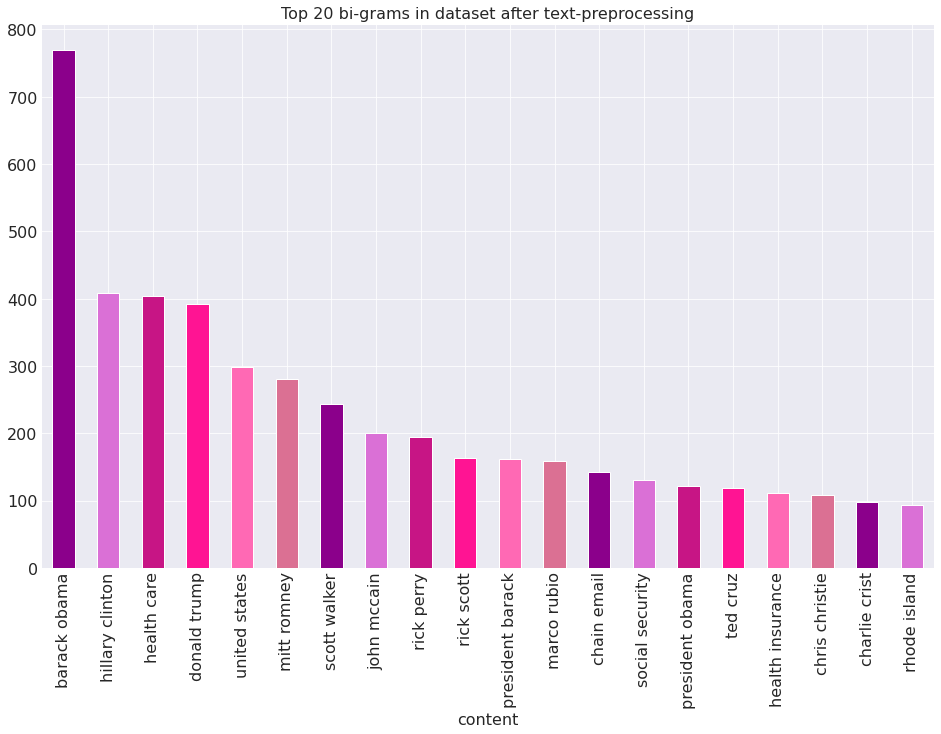

In [62]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_bigram(train["content"], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns=["content", "count"])
df4.groupby("content").sum()["count"].sort_values(ascending=False).plot(
    kind="bar",
    title="Top 20 bi-grams in dataset after text-preprocessing",
    color=[
        "darkmagenta",
        "orchid",
        "mediumvioletred",
        "deeppink",
        "hotpink",
        "palevioletred",
    ],
)

In [63]:
def plot_word_number_histogram(textno, textye):

    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color="#e74c3c")
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color="#e74c3c")

    axes[0].set_xlabel("Word Count")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Reliable")
    axes[1].set_xlabel("Word Count")
    axes[1].set_title("Unreliable")

    fig.suptitle("Fake News", fontsize=24, va="baseline")

    fig.tight_layout()

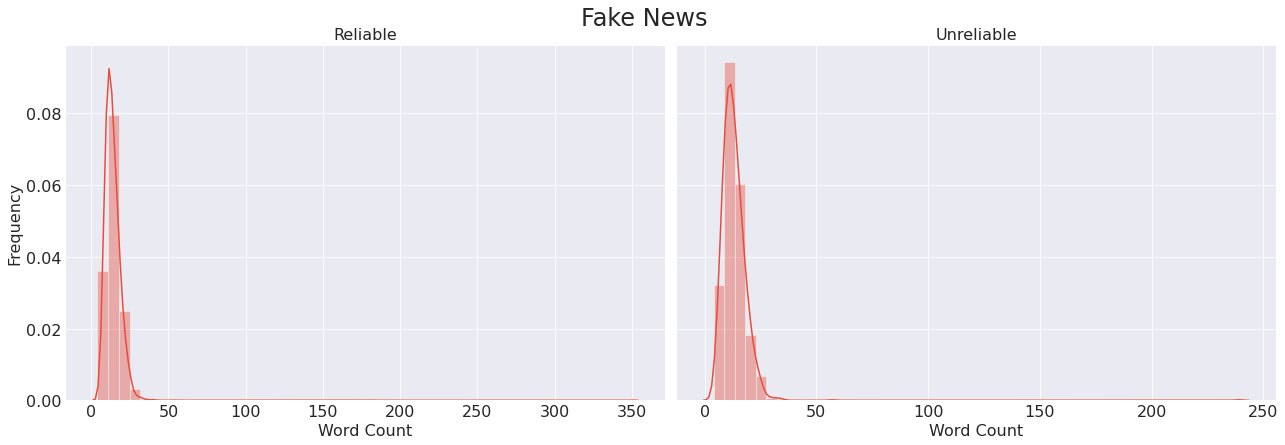

In [64]:
plot_word_number_histogram(
    train[train["label"] == 0]["content"], train[train["label"] == 1]["content"]
)

In [65]:
def plot_word_len_histogram(textno, textye):

    """A function for comparing average word length"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(
        textno.str.split()
        .apply(lambda x: [len(i) for i in x])
        .map(lambda x: np.mean(x)),
        ax=axes[0],
        color="#e74c3c",
    )
    sns.distplot(
        textye.str.split()
        .apply(lambda x: [len(i) for i in x])
        .map(lambda x: np.mean(x)),
        ax=axes[1],
        color="#e74c3c",
    )

    axes[0].set_xlabel("Word Length")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Reliable")
    axes[1].set_xlabel("Word Length")
    axes[1].set_title("Unreliable")

    fig.suptitle("Mean Word Lengths", fontsize=24, va="baseline")
    fig.tight_layout()

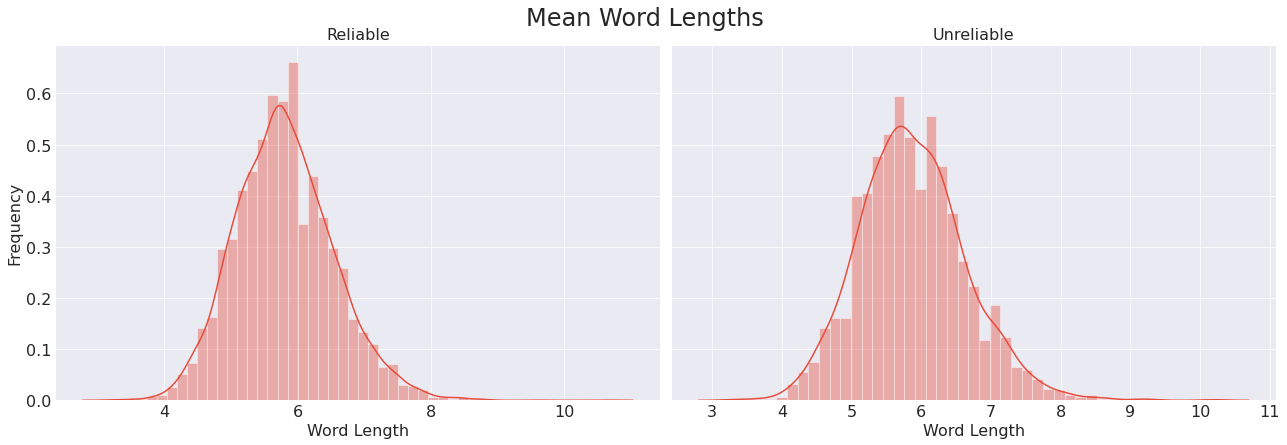

In [66]:
plot_word_len_histogram(
    train[train["label"] == 0]["content"], train[train["label"] == 1]["content"]
)

In [67]:
lis_text = [
    train[train["label"] == 0]["content"],
    train[train["label"] == 1]["content"],
]

lis_title = [
    train[train["label"] == 0]["content"],
    train[train["label"] == 1]["content"],
]

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_text, axes):
    try:
        new = i.str.split()
        new = new.values.tolist()
        corpus = [word.lower() for i in new for word in i]
        dic = defaultdict(int)
        for word in corpus:
            if word in stop:
                dic[word] += 1
        #   print(dic)
        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
        #   print(top)
        x, y = zip(*top)
        df = pd.DataFrame([x, y]).T
        df = df.rename(columns={0: "Stopword", 1: "Count"})
        sns.barplot(x="Count", y="Stopword", data=df, palette="plasma", ax=j)
        plt.tight_layout()
    except:
        plt.close()
        print("No stopwords left in texts.")
        break

No stopwords left in texts.


['says', 'obama', 'state', 'year', 'tax', 'barack', 'percent', 'president', 'health', 'scott', 'trump', 'donald', 'bill', 'care', 'job', 'john', 'people', 'would', 'government', 'new', 'wisconsin', 'budget', 'million', 'us', 'rick', 'billion', 'law'] [447, 221, 215, 198, 180, 159, 152, 151, 140, 124, 123, 121, 121, 119, 116, 113, 109, 105, 99, 99, 95, 90, 89, 88, 87, 84, 83]


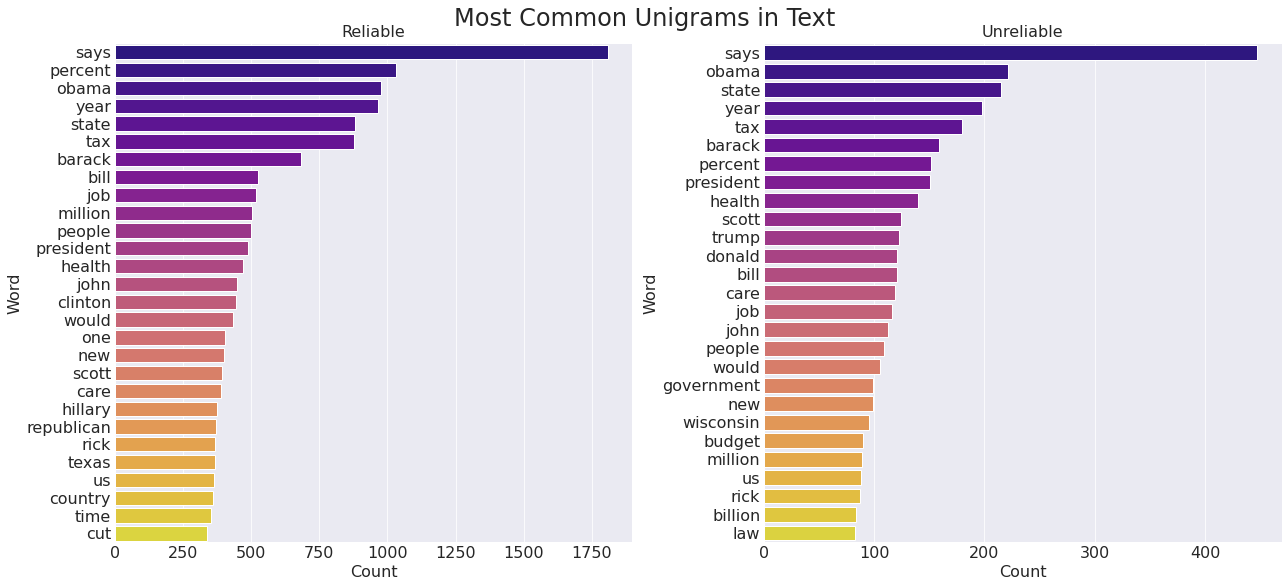

In [69]:
# Displaying most common words.
from collections import Counter, defaultdict

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_text, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if word not in stop:
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette="plasma", ax=j)
print(x, y)
axes[0].set_title("Reliable")
axes[1].set_title("Unreliable")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Word")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Word")

fig.suptitle("Most Common Unigrams in Text", fontsize=24, va="baseline")
plt.tight_layout()

['says', 'obama', 'state', 'year', 'tax', 'barack', 'percent', 'president', 'health', 'scott', 'trump', 'donald', 'bill', 'care', 'job', 'john', 'people', 'would', 'government', 'new', 'wisconsin', 'budget', 'million', 'us', 'rick', 'billion', 'law'] [447, 221, 215, 198, 180, 159, 152, 151, 140, 124, 123, 121, 121, 119, 116, 113, 109, 105, 99, 99, 95, 90, 89, 88, 87, 84, 83]


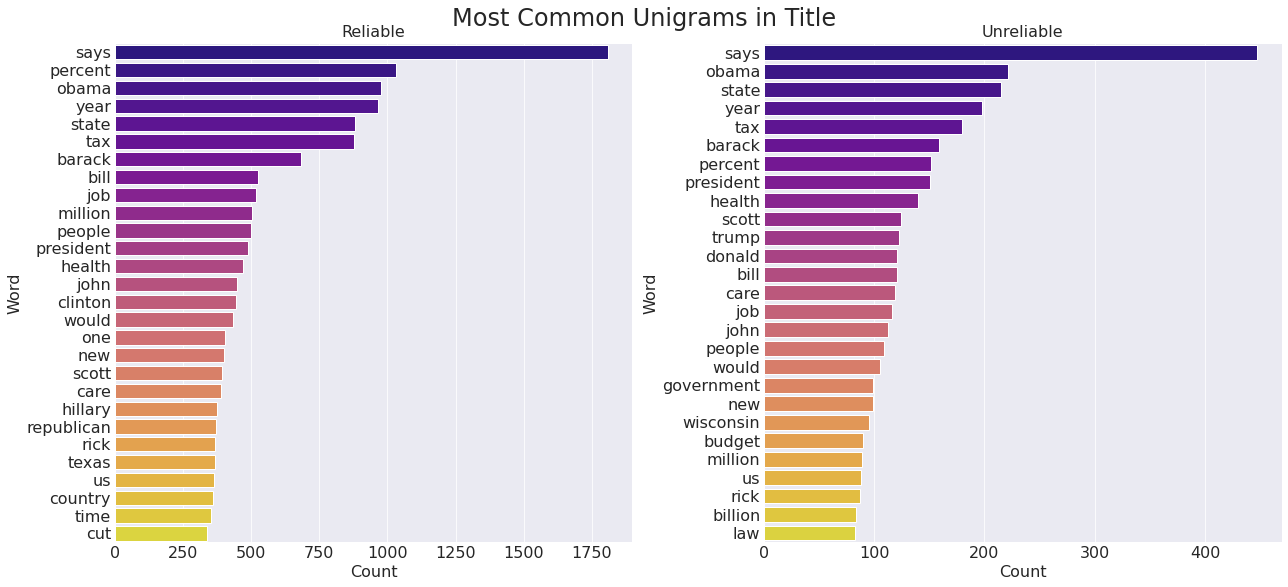

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis_title, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if word not in stop:
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette="plasma", ax=j)
print(x, y)
axes[0].set_title("Reliable")
axes[1].set_title("Unreliable")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Word")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Word")

fig.suptitle("Most Common Unigrams in Title", fontsize=24, va="baseline")
plt.tight_layout()

In [71]:
from sklearn.feature_extraction.text import CountVectorizer


def ngrams(n, title, lis_type):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis_type, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            # getting top ngrams
            vec = CountVectorizer(
                ngram_range=(n, n), max_df=0.9, stop_words="english"
            ).fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [
                (word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()
            ]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette="plasma", ax=j)

        axes[0].set_title("Reliable")
        axes[1].set_title("Unreliable")
        axes[0].set_xlabel("Count")
        axes[0].set_ylabel("Words")
        axes[1].set_xlabel("Count")
        axes[1].set_ylabel("Words")
        fig.suptitle(title, fontsize=24, va="baseline")
        plt.tight_layout()

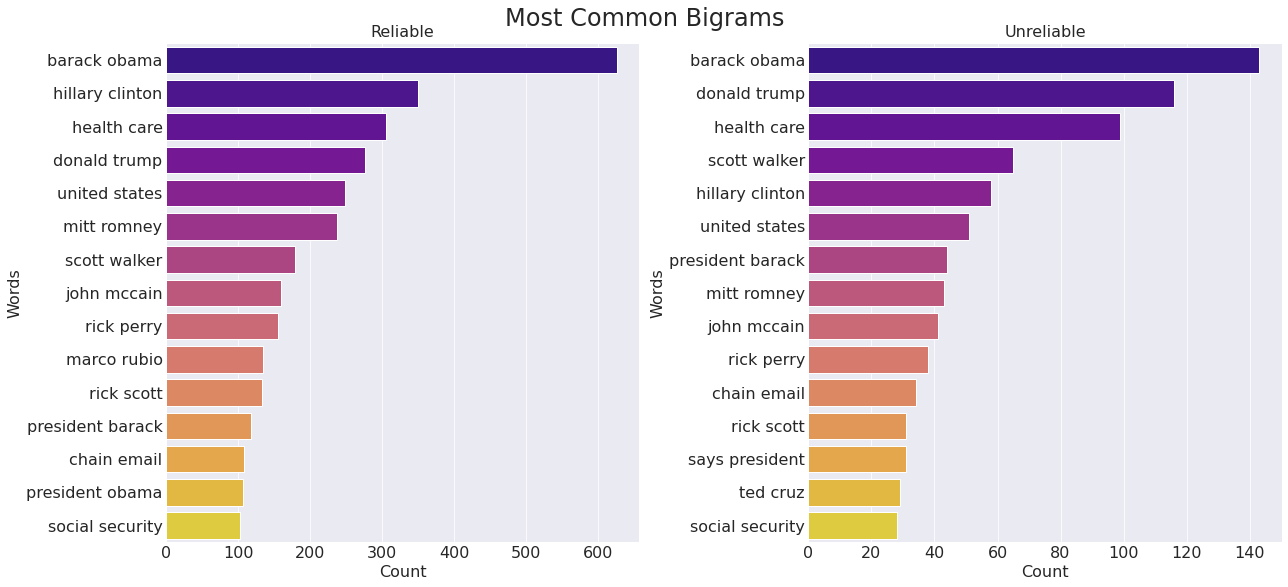

In [72]:
ngrams(2, "Most Common Bigrams", lis_title)

In [73]:
# Obtain the total words present in the dataset
list_of_words = []
for i in train.content:
    for j in i:
        list_of_words.append(j)

In [74]:
len(list_of_words)

962901

In [75]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

39

In [76]:
# dataframe information
train.info()
# check for null values
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label name  10239 non-null  object
 1   news        10239 non-null  object
 2   author      10239 non-null  object
 3   id          10239 non-null  int64 
 4   label       10239 non-null  int64 
 5   content     10239 non-null  object
dtypes: int64(2), object(4)
memory usage: 480.1+ KB


label name    0
news          0
author        0
id            0
label         0
content       0
dtype: int64

#### Scrap all columns except Content and Label

In [77]:
train = train[["content", "label"]]

In [78]:
train.head()
# column 'total' has the preprocessed text

,content,label
0,when decline coal start it started natural ga...,0
1,hillary clinton agrees john mccain voting giv...,0
2,health care reform legislation likely mandate...,1
3,the economic turnaround started end term char...,0
4,the chicago bears starting quarterback last 1...,0


In [79]:
from sklearn.feature_extraction.text import CountVectorizer

train_set = {"the sky is blue", "the sun is bright"}
count_vec = CountVectorizer(max_features=3)
a = count_vec.fit_transform(train_set)
a.todense()

matrix([[1, 1, 1],
        [0, 1, 1]])

In [80]:
count_vec.get_feature_names_out()

array(['blue', 'is', 'the'], dtype=object)

#### Applying NLP Techniques

In [81]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
X_train = train["content"]
Y_train = train["label"]

#### Bag-of-words / CountVectorizer

In [83]:
# the corpus holds some sentences
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# in sklearn, we can import Bag of Words model through CountVectorizer. This works pretty much like Bag of words
# it is modified version of Bag of Words. It replaces the vector, instead of 1, w the frequency...

# we r making the object, vectorizer, of class/module CountVectorizer()
vectorizer = CountVectorizer()

In [84]:
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print("The above words are the unique words and consists of the feature set")

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
The above words are the unique words and consists of the feature set


In [85]:
print(
    "The below matrix will show the frequency of the features in the feature set",
    end="\n\n",
)
X.todense()

The below matrix will show the frequency of the features in the feature set



matrix([[0, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 2, 0, 1, 0, 1, 1, 0, 1],
        [1, 0, 0, 1, 1, 0, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 0, 1]])

#### TF-iDF Vectorizer

In [86]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer(
        stop_words="english",  # it will remove the englsh stopwords
        decode_error="strict",
        analyzer="word",
        ngram_range=(1, 2),  # single_words or 2words(bi-grams)
        max_features=max_features
        # max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing
    )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [87]:
tfidf_features = vectorize_text(["hello how are you doing", "hi i am doing fine"], 30)
# 30 here is the number of max_features

In [88]:
print("creates some weight for all these words: ", end="\n\n")
tfidf_features

creates some weight for all these words: 



array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

#### Applying Feature Extraction using count vectorization and tfidf

In [89]:
# Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [90]:
print("10 feature names are:", end="\n\n")
count_vectorizer.get_feature_names()[9000:9010]

10 feature names are:



['nonviolent',
 'noonan',
 'norbert',
 'norcross',
 'nordic',
 'norm',
 'normal',
 'normalization',
 'normandy',
 'norment']

In [91]:
tf_idf_matrix

<10239x14151 sparse matrix of type '<class 'numpy.float64'>'
	with 134198 stored elements in Compressed Sparse Row format>

In [92]:
tf_idf_matrix.toarray().shape

(10239, 14151)

#### Modelling

* We will try different models, compare the results and would proceed with the best model for our analysis

In [93]:
# split in samples
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    tf_idf_matrix, Y_train, random_state=0
)

In [94]:
print(X_train.shape, y_train.shape)

(7679, 14151) (7679,)


In [95]:
print(X_test.shape, y_test.shape)

(2560, 14151) (2560,)


#### Passive Aggressive Classifier

In [96]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=10000, random_state=1, tol=1e-3).fit(
    X_train, y_train
)

In [97]:
y_pred_pa = model.predict(X_test)
print(model.score(X_test, y_test))

0.708203125


In [98]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_pa))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2084
           1       0.21      0.20      0.20       476

    accuracy                           0.71      2560
   macro avg       0.51      0.51      0.51      2560
weighted avg       0.70      0.71      0.71      2560



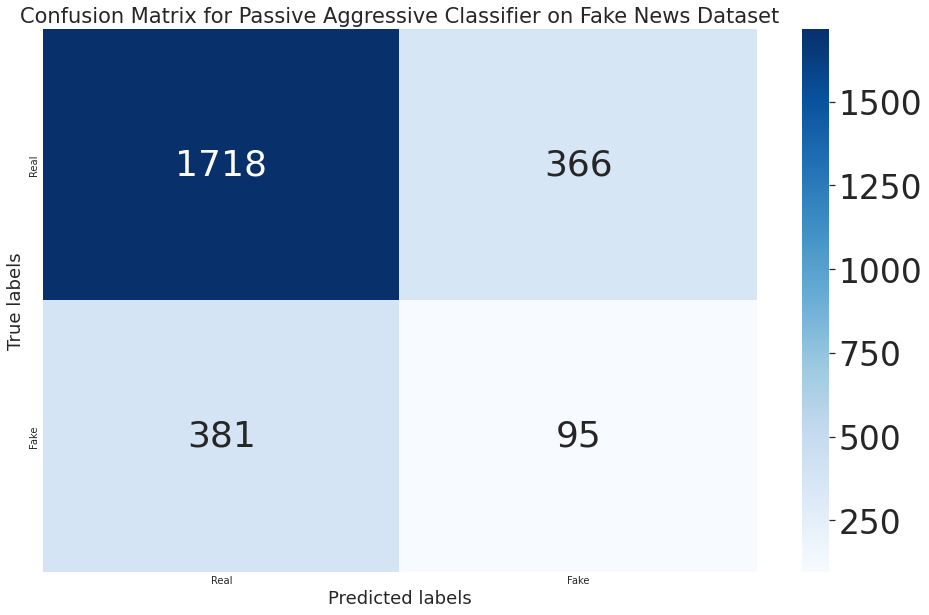

<Figure size 1152x720 with 0 Axes>

In [99]:
cm = confusion_matrix(y_test, y_pred_pa)

ax = plt.subplot()
sns.set(font_scale=3.0)  # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g")

# Labels, title and ticks
label_font = {"size": "18"}  # Adjust to fit
ax.set_xlabel("Predicted labels", fontdict=label_font)
ax.set_ylabel("True labels", fontdict=label_font)

title_font = {"size": "21"}  # Adjust to fit
ax.set_title(
    "Confusion Matrix for Passive Aggressive Classifier on Fake News Dataset",
    fontdict=title_font,
)

ax.tick_params(axis="both", which="major", labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(["Real", "Fake"])
ax.yaxis.set_ticklabels(["Real", "Fake"])
plt.show()
plt.savefig("PassiveAgressive.png")

#### Logistic Regression Classifier

In [100]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000, random_state=1, tol=1e-3).fit(
    X_train, y_train
)

In [101]:
y_pred_lr = model.predict(X_test)
print(model.score(X_test, y_test))

0.814453125


In [102]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2084
           1       0.53      0.02      0.03       476

    accuracy                           0.81      2560
   macro avg       0.67      0.51      0.46      2560
weighted avg       0.76      0.81      0.74      2560



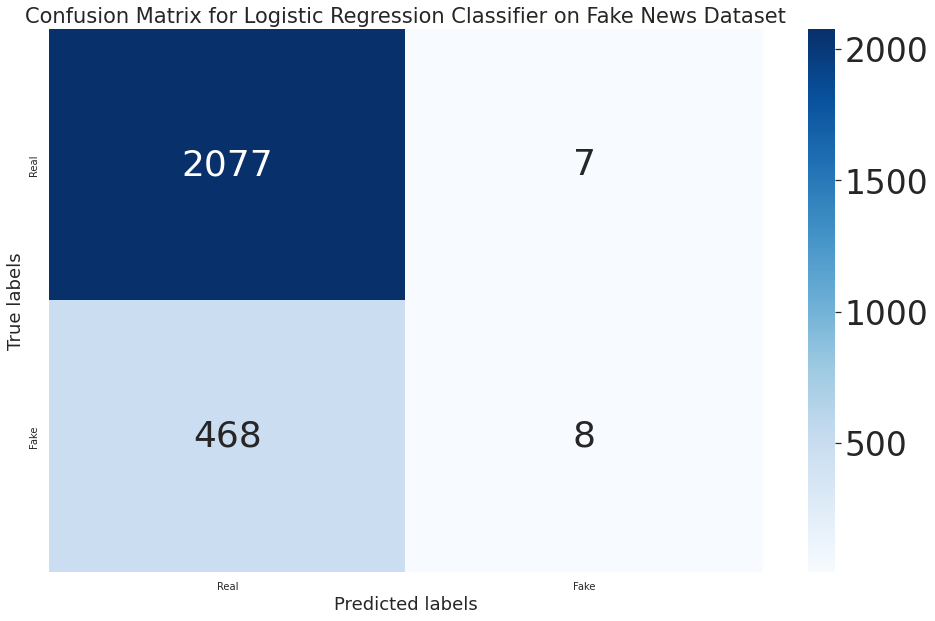

<Figure size 1152x720 with 0 Axes>

In [103]:
cm = confusion_matrix(y_test, y_pred_lr)

ax = plt.subplot()
sns.set(font_scale=3.0)  # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g")

# Labels, title and ticks
label_font = {"size": "18"}  # Adjust to fit
ax.set_xlabel("Predicted labels", fontdict=label_font)
ax.set_ylabel("True labels", fontdict=label_font)

title_font = {"size": "21"}  # Adjust to fit
ax.set_title(
    "Confusion Matrix for Logistic Regression Classifier on Fake News Dataset",
    fontdict=title_font,
)

ax.tick_params(axis="both", which="major", labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(["Real", "Fake"])
ax.yaxis.set_ticklabels(["Real", "Fake"])
plt.show()
plt.savefig("LogisticRegression.png")

#### Decision Tree  Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train, y_train)

In [105]:
y_pred_dt = model.predict(X_test)
print(model.score(X_test, y_test))

0.723046875


In [106]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2084
           1       0.23      0.22      0.23       476

    accuracy                           0.72      2560
   macro avg       0.53      0.53      0.53      2560
weighted avg       0.71      0.72      0.72      2560



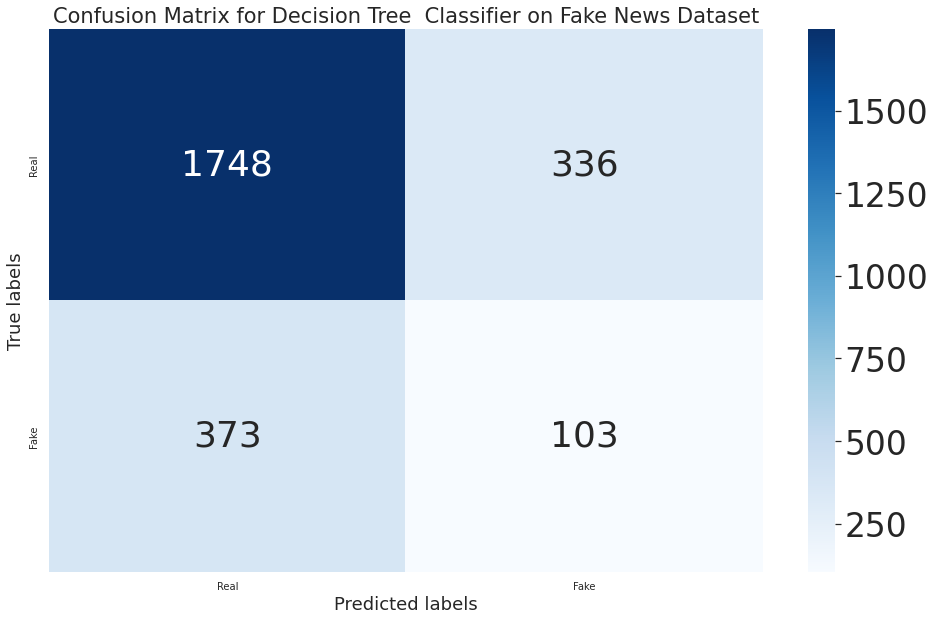

<Figure size 1152x720 with 0 Axes>

In [107]:
cm = confusion_matrix(y_test, y_pred_dt)

ax = plt.subplot()
sns.set(font_scale=3.0)  # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g")

# Labels, title and ticks
label_font = {"size": "18"}  # Adjust to fit
ax.set_xlabel("Predicted labels", fontdict=label_font)
ax.set_ylabel("True labels", fontdict=label_font)

title_font = {"size": "21"}  # Adjust to fit
ax.set_title(
    "Confusion Matrix for Decision Tree  Classifier on Fake News Dataset",
    fontdict=title_font,
)

ax.tick_params(axis="both", which="major", labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(["Real", "Fake"])
ax.yaxis.set_ticklabels(["Real", "Fake"])
plt.show()
plt.savefig("DecisionTreeClassifier.png")

#### Random Forest  Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train, y_train)

In [109]:
y_pred_rf = model.predict(X_test)
print(model.score(X_test, y_test))

0.81015625


In [110]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2084
           1       0.42      0.06      0.10       476

    accuracy                           0.81      2560
   macro avg       0.62      0.52      0.50      2560
weighted avg       0.75      0.81      0.75      2560



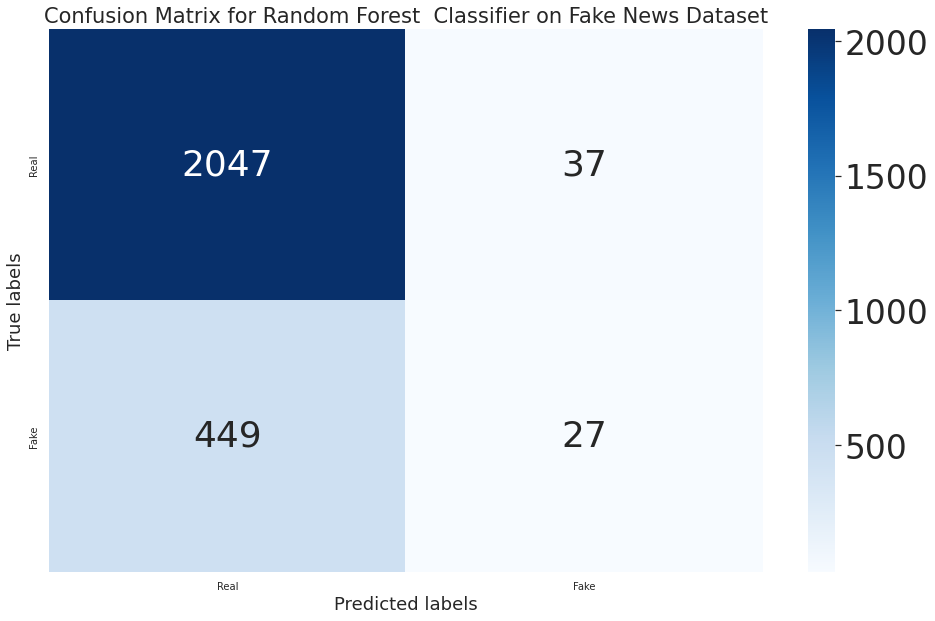

<Figure size 1152x720 with 0 Axes>

In [111]:
cm = confusion_matrix(y_test, y_pred_rf)

ax = plt.subplot()
sns.set(font_scale=3.0)  # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g")

# Labels, title and ticks
label_font = {"size": "18"}  # Adjust to fit
ax.set_xlabel("Predicted labels", fontdict=label_font)
ax.set_ylabel("True labels", fontdict=label_font)

title_font = {"size": "21"}  # Adjust to fit
ax.set_title(
    "Confusion Matrix for Random Forest  Classifier on Fake News Dataset",
    fontdict=title_font,
)

ax.tick_params(axis="both", which="major", labelsize=10)  # Adjust to fit
ax.xaxis.set_ticklabels(["Real", "Fake"])
ax.yaxis.set_ticklabels(["Real", "Fake"])
plt.show()
plt.savefig("RandomForestClassifier.png")

#### Comparison of different models 
We performed a comparison of all our models based on their accuracy, precision, recall and f1 score

In [112]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1_score": make_scorer(f1_score),
}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the machine learning classifiers
pa_model = PassiveAggressiveClassifier(max_iter=10000)
lr_model = LogisticRegression(max_iter=10000)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Define the models evaluation function
def models_evaluation(X, y, folds):

    """
    X : data set features
    y : data set target
    folds : number of cross-validation folds

    """

    # Perform cross-validation to each machine learning classifier
    pa = cross_validate(pa_model, X, y, cv=folds, scoring=scoring)
    lr = cross_validate(lr_model, X, y, cv=folds, scoring=scoring)
    dt = cross_validate(dt_model, X, y, cv=folds, scoring=scoring)
    rf = cross_validate(rf_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame(
        {
            "Logistic Regression": [
                lr["test_accuracy"].mean(),
                lr["test_precision"].mean(),
                lr["test_recall"].mean(),
                lr["test_f1_score"].mean(),
            ],
            "Passive Aggressive Classifier": [
                pa["test_accuracy"].mean(),
                pa["test_precision"].mean(),
                pa["test_recall"].mean(),
                pa["test_f1_score"].mean(),
            ],
            "Decision Tree": [
                dt["test_accuracy"].mean(),
                dt["test_precision"].mean(),
                dt["test_recall"].mean(),
                dt["test_f1_score"].mean(),
            ],
            "Random Forest": [
                rf["test_accuracy"].mean(),
                rf["test_precision"].mean(),
                rf["test_recall"].mean(),
                rf["test_f1_score"].mean(),
            ],
        },
        index=["Accuracy", "Precision", "Recall", "F1 Score"],
    )

    # Add 'Best Score' column
    models_scores_table["Best Score"] = models_scores_table.idxmax(axis=1)

    # Return models performance metrics scores data frame
    return models_scores_table


# Run models_evaluation function
models_evaluation(X_train, y_train, 4)

,Logistic Regression,Passive Aggressive Classifier,Decision Tree,Random Forest,Best Score
Accuracy,0.802449,0.702696,0.716370,0.797500,Logistic Regression
Precision,0.550000,0.233387,0.241647,0.362923,Logistic Regression
Recall,0.009881,0.221336,0.202915,0.031624,Passive Aggressive Classifier
F1 Score,0.019300,0.227088,0.220477,0.058161,Passive Aggressive Classifier


#### Outcome Interpretation

According to the results from the table above, the Logistic Regression Classifier obtained the best accuracy and precision, making it the most reliable machine learning classifier for this data set. On the other hand, it can be stated that rest all models had the poorest performance, and thus, are not reliable classification models for this data set.

#### What Comes Next?

After the Logistic Regression Classifier has been identified as the most reliable machine learning classifier, the next step would consist in tuning its parameters to determine if its performance can further be improved.

It is worth specifying that during the instantiation of the machine learning classifiers in the code above, their parameters were set to the default ones, except for the max_iter parameter in the Logistic Regression Classifier model and Passive Aggressive Classifier to achieve model convergence since the number of samples is larger than the number of features.

## Thank you
This notebook ends here, please document your feedback